In [1]:
# MIT License

# Copyright (c) 2024 GitHub

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# Svarah: An Indic accented English speech dataset

India is the second largest English-speaking country in the world with a speaker base of roughly 130 million. Unfortunately, Indian speakers find a very poor representation in existing English ASR benchmarks such as LibriSpeech, Switchboard, Speech Accent Archive, etc. We address this gap by creating Svarah, a benchmark that contains 9.6 hours of transcribed English audio from 117 speakers across 65 districts across 19 states in India, resulting in a diverse range of accents. The collective set of native languages spoken by the speakers covers 19 of the 22 constitutionally recognized languages of India, belonging to 4 different language families.

Svarah includes both read speech and spontaneous conversational data, covering a variety of domains such as history, culture, tourism, government, sports, etc. It also contains data corresponding to popular use cases such as ordering groceries, making digital payments, and using government services (e.g., checking pension claims, checking passport status, etc.). The resulting diversity in vocabulary as well as use cases allows a more robust evaluation of ASR systems for real-world applications.

# Import Libraries

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torchaudio
from IPython.display import Audio

In [3]:
dir_path = "../data/svarah/"
svarah_sample = pd.read_csv(dir_path+"meta_speaker_stats.csv")
svarah_sample.sample(10)

,audio_filepath,duration,text,gender,age-group,primary_language,native_place_state,native_place_district,highest_qualification,job_category,occupation_domain
4996,audio/281474976884109_f849_chunk_0.wav,7.202813,Can you stop automatically sending Samreen Rs....,Female,18-30,Marathi,Maharashtra,Ratnagiri,Graduate,Part Time,Social service
1585,audio/281474976906733_f2443_chunk_0.wav,1.686937,Don't go over the top,Male,18-30,Assamese,Assam,Lakhimpur,Post Graduate,Full Time,Technology and Services
448,audio/281474976899699_f1736_chunk_0.wav,0.508500,"No,",Female,45-60,Bengali,West Bengal,South 24 Parganas,Graduate,Other,Financial Services (Banking and Insurance)
622,audio/281474976897698_f2740_chunk_0.wav,0.581625,Five,Male,60+,Odia,Odisha,Sundergarh,Graduate,Freelance,Education and Research
3071,audio/281474976884634_f2217_chunk_13.wav,3.880313,southern part of Karnataka is well known for C...,Female,18-30,Kannada,Karnataka,Hassan,Post Graduate,Full Time,Technology and Services
2491,audio/281474976901666_f1670_chunk_2.wav,3.048875,secrecy when i'm adding certain ingredients,Female,45-60,Kannada,Karnataka,Bangalore Urban,Post Graduate,Full Time,Education and Research
991,audio/281474976894761_f700_chunk_0.wav,0.777750,Wow,Female,30-45,Nepali,West Bengal,Kalimpong,Post Graduate,Full Time,Education and Research
6484,audio/281474976900644_f2038_chunk_7.wav,17.314125,he has written such a thing that when a person...,Male,30-45,Urdu,Gujarat,Ahmedabad,Graduate,Full Time,Technology and Services
1911,audio/281474976885511_f1695_chunk_4.wav,2.184750,homework needed to be done before,Male,18-30,Kannada,Karnataka,Bangalore Urban,Graduate,Part Time,Information and Media
1747,audio/281474976893738_f626_chunk_0.wav,1.948687,show me all Plates items,Male,30-45,Punjabi,Punjab,Mansa,Post Graduate,Full Time,Government


In [4]:
# Check for missing values
missing_values = svarah_sample.isnull().sum()
missing_values

audio_filepath           0
duration                 0
text                     0
gender                   0
age-group                0
primary_language         0
native_place_state       0
native_place_district    0
highest_qualification    0
job_category             0
occupation_domain        0
dtype: int64

In [5]:
# Descriptive statistics for the numerical column 'duration'
duration_stats = svarah_sample['duration'].describe()

# Summary statistics for categorical columns
categorical_summary = svarah_sample.describe(include=['object'])

display(duration_stats, categorical_summary)

count    6656.000000
mean        5.200120
std         4.568625
min         0.098000
25%         1.815234
50%         4.208344
75%         7.200000
max        29.871063
Name: duration, dtype: float64

,audio_filepath,text,gender,age-group,primary_language,native_place_state,native_place_district,highest_qualification,job_category,occupation_domain
count,6656,6656,6656,6656,6656,6656,6656,6656,6656,6656
unique,6656,5585,2,4,19,17,65,6,4,11
top,audio/281474976895472_f74_chunk_0.wav,Jump,Female,30-45,Nepali,West Bengal,Pathanamthitta,Post Graduate,Full Time,Education and Research
freq,1,31,3579,2670,599,792,352,4212,4065,3197


In [6]:
# Function to create bar plots for categorical data
def plot_frequency_distribution(column_name, data, title):
    # Get the value counts from the data of a specific column
    freq_dist = data[column_name].value_counts()
    display(freq_dist)

    # Plot frequency distribution
    plt.figure(figsize=(7, 5))
    sns.countplot(x=column_name, data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

gender
Female    3579
Male      3077
Name: count, dtype: int64

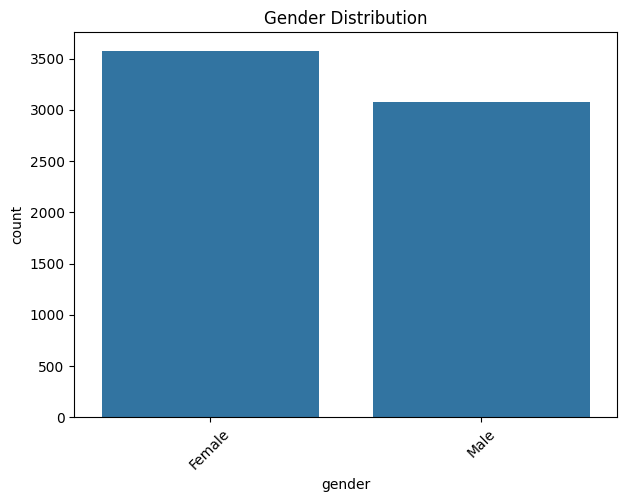

In [7]:
plot_frequency_distribution('gender', svarah_sample, 'Gender Distribution')


age-group
30-45    2670
18-30    2219
45-60    1305
60+       462
Name: count, dtype: int64

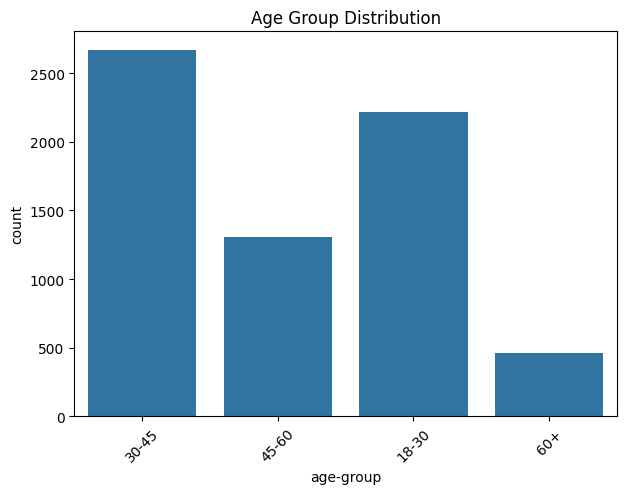

In [8]:
plot_frequency_distribution('age-group', svarah_sample, 'Age Group Distribution')

primary_language
Nepali       599
Kannada      577
Urdu         514
Malayalam    503
Maithili     462
Odia         456
Bodo         402
Tamil        384
Telugu       334
Kashmiri     310
Konkani      302
Bengali      297
Hindi        256
Dogri        255
Gujarati     242
Marathi      231
Assamese     205
Punjabi      189
Sindhi       138
Name: count, dtype: int64

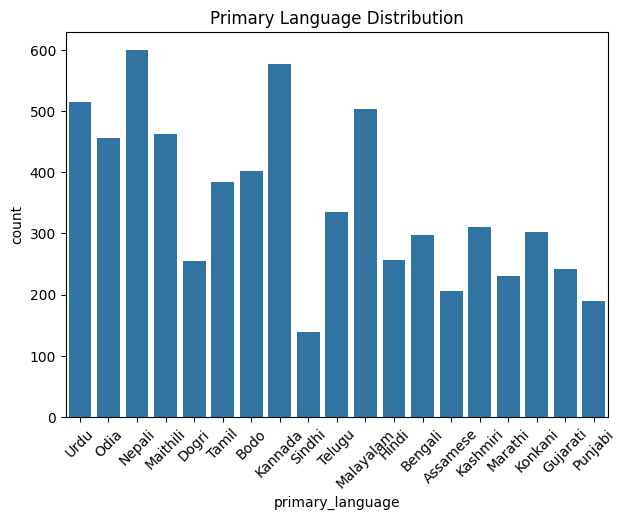

In [9]:
plot_frequency_distribution('primary_language', svarah_sample, 'Primary Language Distribution')

native_place_state
West Bengal       792
Karnataka         774
Assam             680
Kerala            572
Jammu Kashmir     565
Gujarat           564
Bihar             518
Odisha            484
Goa               417
Maharashtra       409
Andhra Pradesh    206
Punjab            189
Tamil Nadu        178
Telangana         125
Rajasthan          95
Meghalaya          51
Madhya Pradesh     37
Name: count, dtype: int64

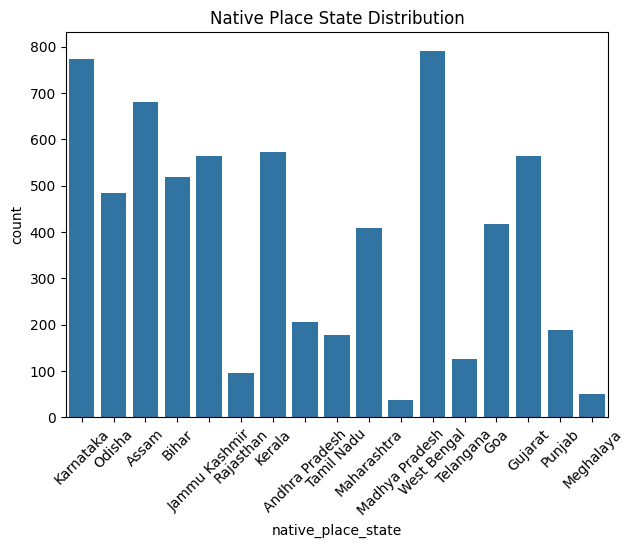

In [10]:
plot_frequency_distribution('native_place_state', svarah_sample, 'Native Place State Distribution')

highest_qualification
Post Graduate                              4212
Graduate                                   1375
Doctoral (PhD) or higher level              753
Under Graduate Student                      176
Senior Secondary Level at School (10+2)     112
Diploma Holder                               28
Name: count, dtype: int64

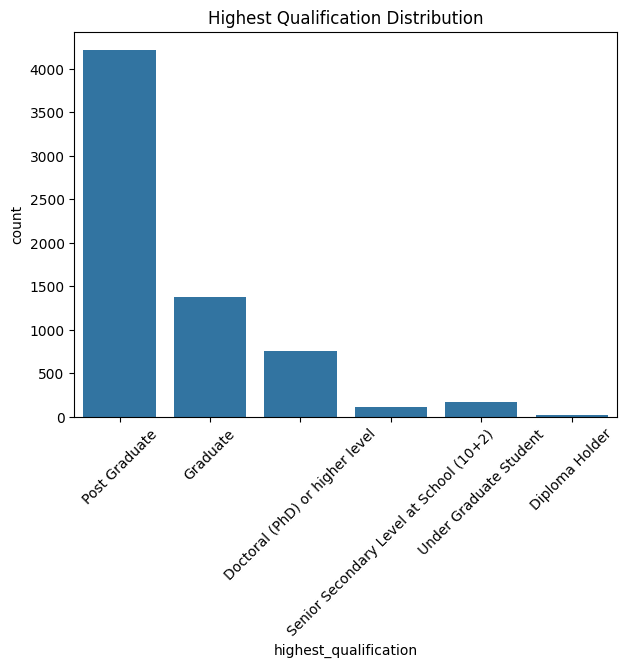

In [11]:
plot_frequency_distribution('highest_qualification', svarah_sample, 'Highest Qualification Distribution')

job_category
Full Time    4065
Other        1229
Part Time     887
Freelance     475
Name: count, dtype: int64

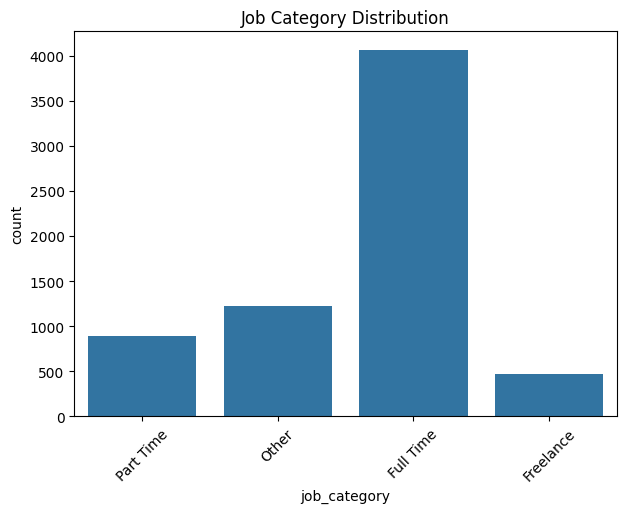

In [12]:
plot_frequency_distribution('job_category', svarah_sample, 'Job Category Distribution')

occupation_domain
Education and Research                        3197
Technology and Services                       1477
Information and Media                          503
Social service                                 383
Government                                     315
Financial Services (Banking and Insurance)     273
Entertainment                                  216
Healthcare (Medical &amp; Pharma)              152
Transportation and Logistics                    73
Manufacturing                                   40
Retail                                          27
Name: count, dtype: int64

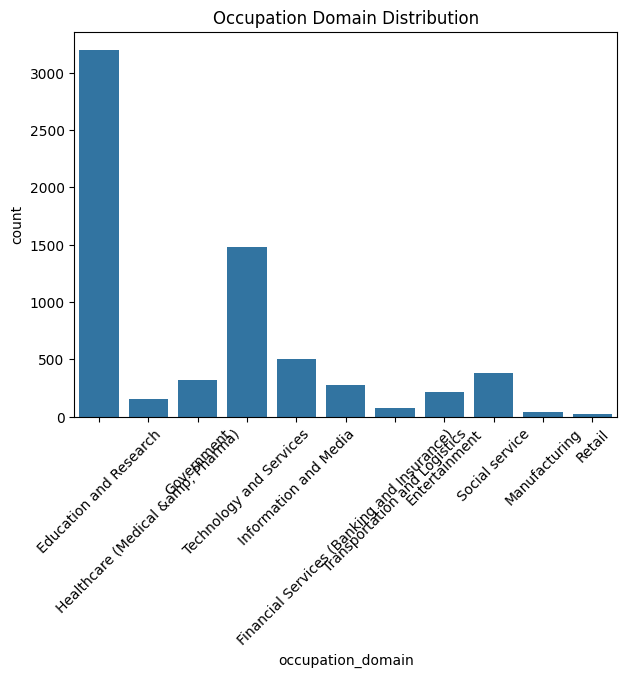

In [13]:
plot_frequency_distribution('occupation_domain', svarah_sample, 'Occupation Domain Distribution')

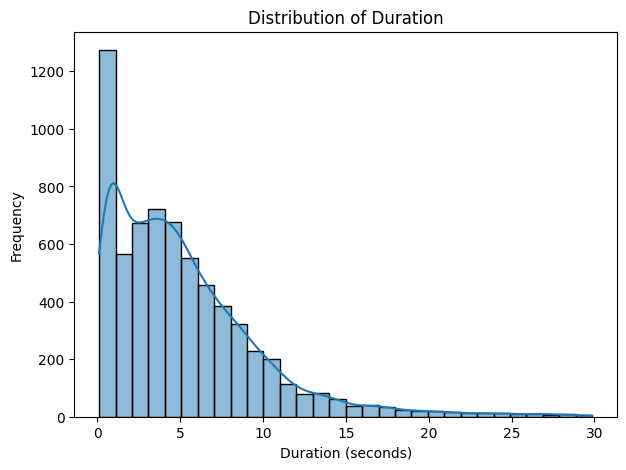

In [14]:
# See the distribution of our audio sample durations
plt.figure(figsize=(7, 5))
sns.histplot(svarah_sample['duration'], kde=True, bins=30)
plt.title('Distribution of Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [15]:
svarah_manifest = pd.read_json(dir_path+"svarah_manifest.json", lines=True)
svarah_manifest.sample(10) # len=6656

,audio_filepath,duration,text
5326,audio/281474976893834_f2664_chunk_0.wav,0.390250,On
1559,audio/281474976896770_f3298_chunk_3.wav,1.593375,was of lower level.
786,audio/281474976896703_f1880_chunk_3.wav,4.127000,And the economy will also be increased.
1798,audio/281474976900603_f2255_chunk_1.wav,1.590875,Sultan Ahmed Shah
3641,audio/281474976894274_f2214_chunk_0.wav,7.144812,I have completed my basic education from the M...
1445,audio/281474976886991_f2229_chunk_0.wav,24.597125,Both the quotes I remember are by Julius Caesa...
4612,audio/281474976893976_f271_chunk_0.wav,0.488187,No
4484,audio/281474976889870_f2580_chunk_0.wav,3.103312,remove all my meetings for the rest of the week
3662,audio/281474976899971_f2245_chunk_0.wav,10.129188,I am from Darbhanga district. This district is...
1532,audio/281474976885511_f1695_chunk_1.wav,4.347500,it is a book called Moola Madhyamaka Karika


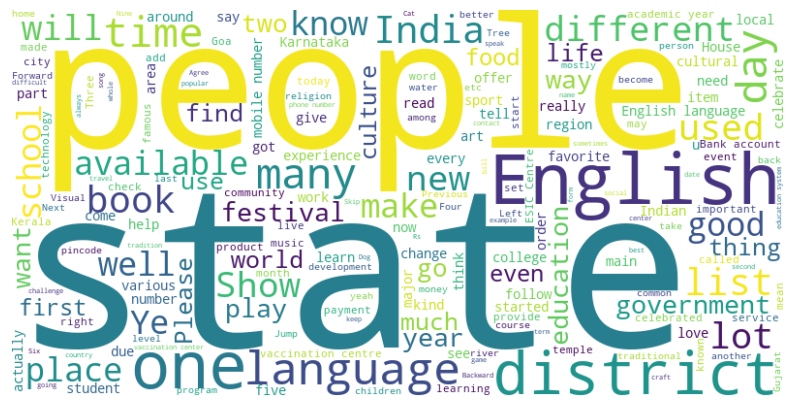

In [16]:
from wordcloud import WordCloud

# Combine all text into a single string
all_text = ' '.join(svarah_manifest['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [19]:
rand_sample = svarah_manifest.sample(1)

audio_rand_sample= dir_path+rand_sample['audio_filepath'].item()
text_rand_sample = rand_sample['text'].item()
print(audio_rand_sample)
print(text_rand_sample)

Audio(audio_rand_sample)

../data/svarah/audio/281474976903906_f3261_chunk_1.wav
but sometimes I used to go for short distance biking trip,
